In [1]:
import igraph as ig
import itertools as it
import pickle
from pathlib import Path

from eptnr.data_generation.utils.synthetic_data_generation import (
    graph_walking_edges_generation,
    set_eptnr_vertices,
    graph_edge_entry,
)
from eptnr.data_generation.utils.eptnr_vertex import EPTNRVertex
from eptnr.constants.igraph_edge_types import IGraphEdgeTypes
from eptnr.constants.igraph_vertex_types import IGraphVertexTypes
from eptnr.constants.igraph_colors import IGraphColors
from eptnr.data_generation.utils.synthetic_speeds import SyntheticTravelSpeeds

# Graph

In [2]:
g = ig.Graph(directed=True)

In [3]:
rc_vertices = [
    # Residential Centers
    EPTNRVertex(0, 0, IGraphColors.PURPLE, IGraphVertexTypes.RC_NODE),
    EPTNRVertex(2, 0, IGraphColors.RED, IGraphVertexTypes.RC_NODE),
    EPTNRVertex(1, 1, IGraphColors.RED, IGraphVertexTypes.RC_NODE),
]
pt_vertices = [
    # Public Transport Nodes
    EPTNRVertex(0, 0, IGraphColors.RED, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(2, 0, IGraphColors.BLUE, IGraphVertexTypes.PT_NODE),
    EPTNRVertex(1, 1, IGraphColors.GREEN, IGraphVertexTypes.PT_NODE),
]
poi_vertices = [
    # Point of Interest Nodes
    EPTNRVertex(0, 0, IGraphColors.GREEN, IGraphVertexTypes.POI_NODE),
    EPTNRVertex(2, 0, IGraphColors.GREEN, IGraphVertexTypes.POI_NODE),
    EPTNRVertex(1, 1, IGraphColors.GREEN, IGraphVertexTypes.POI_NODE),
]
vertices = rc_vertices + pt_vertices + poi_vertices

set_eptnr_vertices(graph=g, vertices=vertices)


## PTN Edges

### Walking

In [4]:
graph_walking_edges_generation(graph=g, vertices=vertices)


### PT

In [5]:
E_BUS = [
    (pt_vertices[0], pt_vertices[1]),  # Bus_line_1
    (pt_vertices[0], pt_vertices[2]),  # Bus_line_2
    (pt_vertices[2], pt_vertices[1]),  # Bus_line_3
]

names = ['Bus_line_1', 'Bus_line_2', 'Bus_line_3']

graph_edge_entry(
    graph=g,
    edges=E_BUS,
    names=names,
    speed=SyntheticTravelSpeeds.BUS_SPEED,
    edge_type=IGraphEdgeTypes.BUS,
    color=IGraphColors.PINK,
    round_to_decimals=2,
)


In [6]:
g.es['active'] = 1

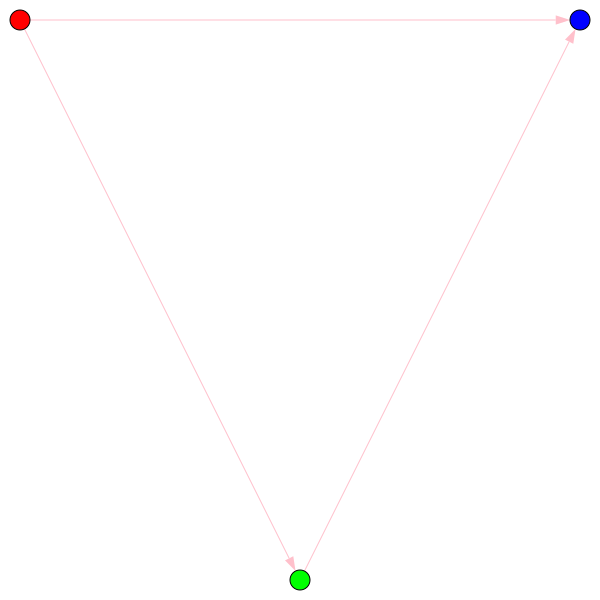

In [7]:
# fig, ax = plt.subplots(figsize=(5,5))
ig.plot(g.subgraph_edges(g.es.select(type_ne='walk')))

In [8]:
g.write_picklez('../datasets/synthetic_4/graph.picklez')

# Reward Dict
As we will be using this dataset with a custom reward, we will compile the reward dict here.

In [9]:
edge_set = [e.index for e in g.es.select(type_ne='walk')]
possible_configurations = []

for i in range(len(edge_set)+1):
    possible_configurations.extend(list(it.combinations(edge_set, i)))

print("List of all possible configurations of the graph:", possible_configurations)

List of all possible configurations of the graph: [(), (27,), (28,), (29,), (27, 28), (27, 29), (28, 29), (27, 28, 29)]


In [10]:

rewards = {
    (): 100,
    (27,): 0,          # blue
    (28,): 30,         # red
    (29,): 0,          # green
    (27, 28): 20,      # blue, red
    (27, 29): 45,      # blue, green
    (28, 29): 30,      # red, green
    (27, 28, 29): 30   # blue, red, green
}

In [11]:
pickle.dump(rewards, open(Path("../datasets/synthetic_4/reward_dict.pkl"), "wb"))